In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pwd

'/Users/zha970/Documents/data'

In [4]:
dflog = pd.read_csv('cpc_tx01_1213_log.csv')

In [5]:
dflog.head()

,timestamp,method,url,httpcode,timeused,ip
0,13/Dec/2018:04:00:00,GET,communication-preferences,200,34,10.154.6.4
1,13/Dec/2018:04:00:04,GET,communication-preferences,200,33,10.154.6.4
2,13/Dec/2018:04:00:05,GET,communication-preferences,200,39,10.154.6.4
3,13/Dec/2018:04:00:07,GET,communication-preferences,200,50,10.154.6.4
4,13/Dec/2018:04:00:08,GET,communication-preferences,200,37,10.154.6.4


In [6]:
dflog['timestamp'] = pd.to_datetime(dflog['timestamp'], format='%d/%b/%Y:%H:%M:%S')

In [7]:
dflog.httpcode = dflog.httpcode.astype(str)

In [8]:
dflog.drop(['ip'], axis=1, inplace=True)
dflog.set_index('timestamp', inplace=True)
dflog.sort_index(inplace=True)

In [9]:
dflog['method'].value_counts()

GET     566070
POST      5996
PUT       1497
Name: method, dtype: int64

In [10]:
ms = dflog['timeused']

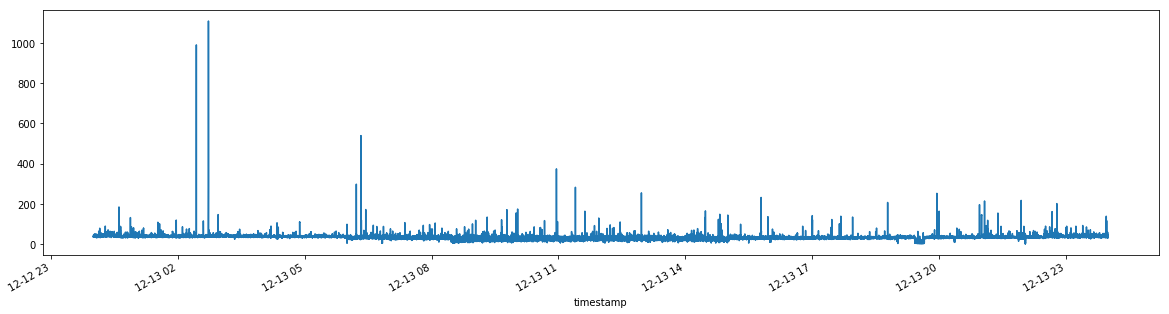

In [11]:
ms.rolling(12).mean().plot(figsize=[20, 5])

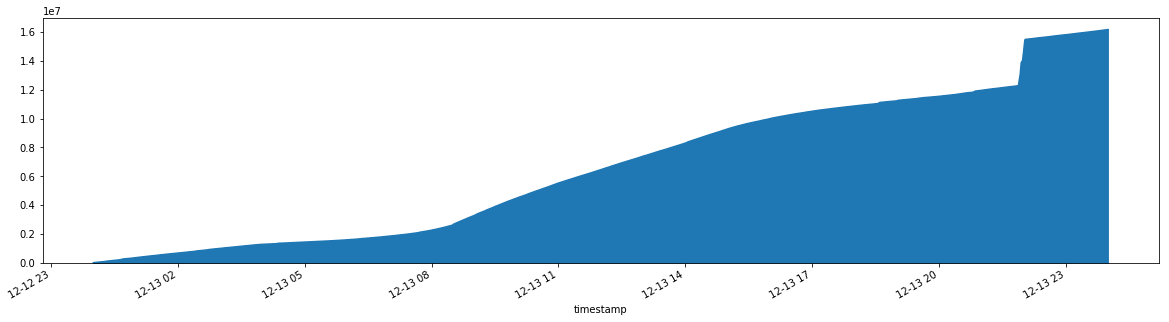

In [12]:
ms.cumsum().plot(kind='area', figsize=[20, 5])

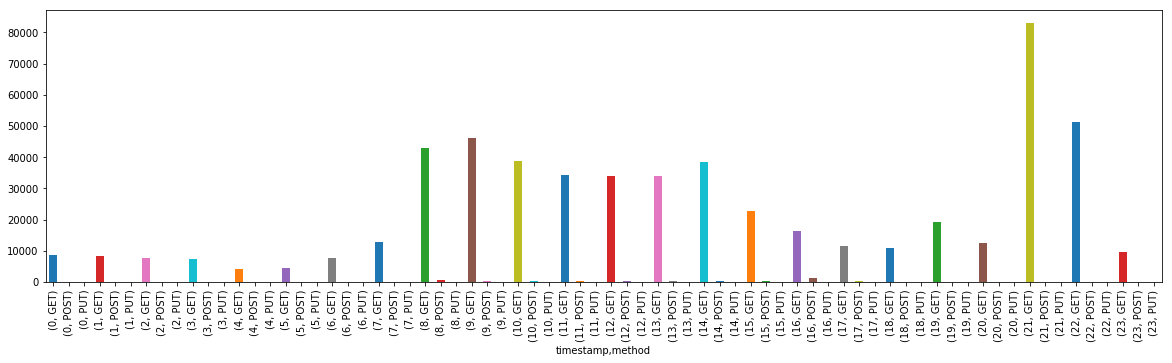

In [13]:
dflog.groupby([dflog.index.hour, 'method'])['url'].count().plot(kind='bar', figsize=[20, 5])

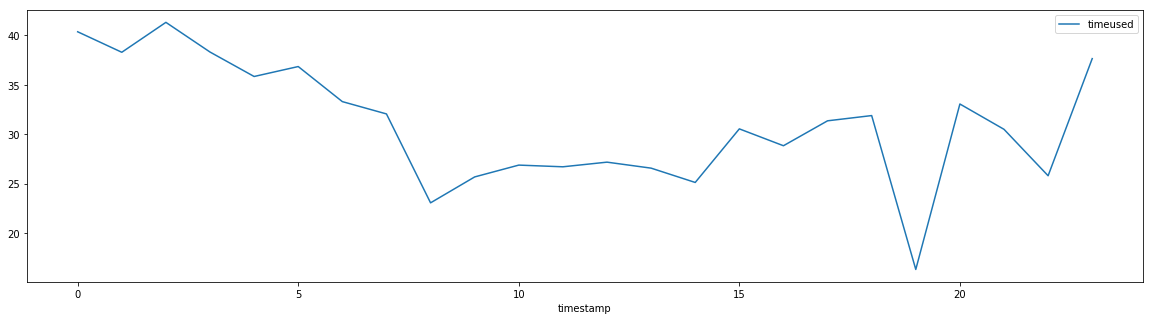

In [14]:
grphr = dflog.groupby(dflog.index.hour)
grphr.mean().plot(figsize=[20, 5])

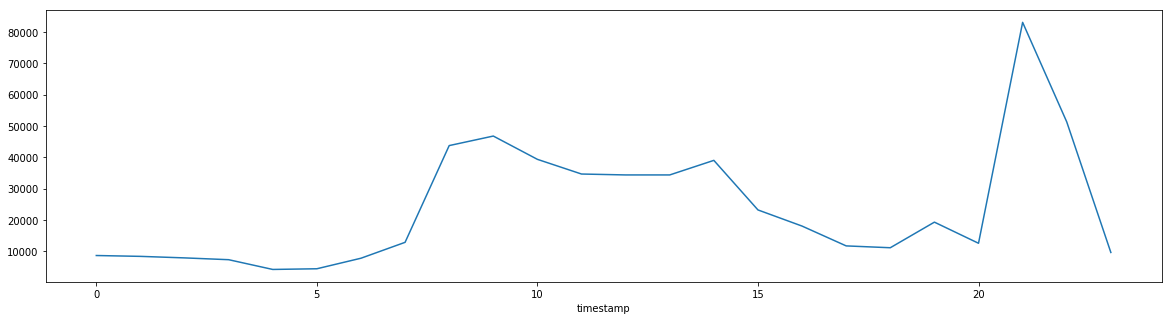

In [15]:
grphr.count()['url'].plot(figsize=[20, 5])

In [16]:
pwd

'/Users/zha970/Documents/data'

In [17]:
ls -l *.csv

-rw-r--r--  1 zha970  419502728  74485716 Dec 24 22:39 20181220.daily_perf.csv
-rw-r--r--  1 zha970  419502728  44414928 Dec 24 22:38 20181221.daily_perf.csv
-rw-r--r--  1 zha970  419502728  29077362 Dec 24 22:38 20181222.daily_perf.csv
-rw-r--r--  1 zha970  419502728   5969172 Dec 24 22:37 20181223.daily_perf.csv
-rw-r--r--  1 zha970  419502728  39183225 Dec 24 16:36 cpc_tx01_1213_log.csv


In [18]:
datetime.strptime('20/Dec/2018:00:10:50', '%d/%b/%Y:%H:%M:%S')

datetime.datetime(2018, 12, 20, 0, 10, 50)

In [19]:
dperf1220 = pd.read_csv('20181220.daily_perf.csv', index_col = 'timestamp',
                        names=['timestamp', 'method', 'url', 'httpcode', 'timeused'],
                        header = None,
                        parse_dates=True,
                        date_parser = lambda x: datetime.strptime(x, '%d/%b/%Y:%H:%M:%S'))
dperf1221 = pd.read_csv('20181221.daily_perf.csv', index_col = 'timestamp',
                        names=['timestamp', 'method', 'url', 'httpcode', 'timeused'],
                        header = None,
                        parse_dates=True,
                        date_parser = lambda x: datetime.strptime(x, '%d/%b/%Y:%H:%M:%S'))
dperf1222 = pd.read_csv('20181222.daily_perf.csv', index_col = 'timestamp',
                        names=['timestamp', 'method', 'url', 'httpcode', 'timeused'],
                        header = None,
                        parse_dates=True,
                        date_parser = lambda x: datetime.strptime(x, '%d/%b/%Y:%H:%M:%S'))
dperf1223 = pd.read_csv('20181223.daily_perf.csv', index_col = 'timestamp',
                        names=['timestamp', 'method', 'url', 'httpcode', 'timeused'],
                        header = None,
                        parse_dates=True,
                        date_parser = lambda x: datetime.strptime(x, '%d/%b/%Y:%H:%M:%S'))


In [20]:
type(dperf1223.index), type(dperf1223.httpcode)

(pandas.core.indexes.datetimes.DatetimeIndex, pandas.core.series.Series)

In [21]:
dperf1220.describe()

,httpcode,timeused
count,1.293600e+06,1.293600e+06
mean,2.021737e+02,2.881806e+01
std,2.134952e+01,2.337171e+01
min,2.000000e+02,1.000000e+00
25%,2.000000e+02,2.500000e+01
50%,2.000000e+02,2.800000e+01
75%,2.000000e+02,3.300000e+01
max,5.000000e+02,8.885000e+03


In [22]:
dperf1220['httpcode'] = dperf1220['httpcode'].astype(str)
dperf1221['httpcode'] = dperf1221['httpcode'].astype(str)
dperf1222['httpcode'] = dperf1222['httpcode'].astype(str)
dperf1223['httpcode'] = dperf1223['httpcode'].astype(str)

In [23]:
dp = pd.concat([dperf1220, dperf1221, dperf1222, dperf1223])

In [24]:
dp.index

DatetimeIndex(['2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:01', '2018-12-20 00:00:01',
               '2018-12-20 00:00:02', '2018-12-20 00:00:02',
               '2018-12-20 00:00:02', '2018-12-20 00:00:03',
               ...
               '2018-12-23 23:59:56', '2018-12-23 23:59:56',
               '2018-12-23 23:59:57', '2018-12-23 23:59:57',
               '2018-12-23 23:59:57', '2018-12-23 23:59:58',
               '2018-12-23 23:59:58', '2018-12-23 23:59:59',
               '2018-12-23 23:59:59', '2018-12-24 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2674645, freq=None)

In [25]:
dp.describe()

,timeused
count,2.674645e+06
mean,4.659443e+01
std,6.625172e+02
min,1.000000e+00
25%,2.600000e+01
50%,2.900000e+01
75%,3.400000e+01
max,3.992500e+04


In [26]:
dp.head()

,method,url,httpcode,timeused
timestamp,,,,
2018-12-20 00:00:00,GET,communication-preferences,200,66
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:00,GET,communication-preferences,200,30
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:01,GET,communication-preferences,200,38


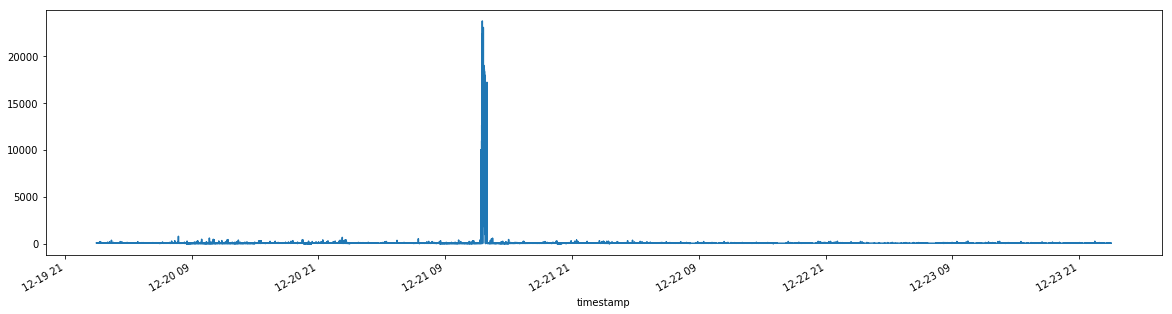

In [27]:
dp['timeused'].rolling(12).mean().plot(figsize=[20, 5])

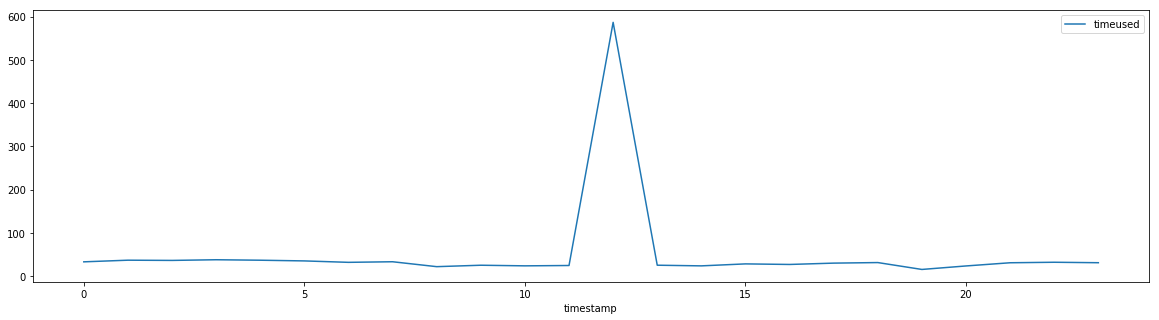

In [28]:
dphr = dp.groupby(dp.index.hour)
dphr.mean().plot(figsize=[20, 5])

In [29]:
dp.index

DatetimeIndex(['2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:01', '2018-12-20 00:00:01',
               '2018-12-20 00:00:02', '2018-12-20 00:00:02',
               '2018-12-20 00:00:02', '2018-12-20 00:00:03',
               ...
               '2018-12-23 23:59:56', '2018-12-23 23:59:56',
               '2018-12-23 23:59:57', '2018-12-23 23:59:57',
               '2018-12-23 23:59:57', '2018-12-23 23:59:58',
               '2018-12-23 23:59:58', '2018-12-23 23:59:59',
               '2018-12-23 23:59:59', '2018-12-24 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2674645, freq=None)

In [30]:
sns.set()

In [31]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2674645 entries, 2018-12-20 00:00:00 to 2018-12-24 00:00:00
Data columns (total 4 columns):
method      object
url         object
httpcode    object
timeused    int64
dtypes: int64(1), object(3)
memory usage: 182.0+ MB


In [32]:
dp.index

DatetimeIndex(['2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:00', '2018-12-20 00:00:00',
               '2018-12-20 00:00:01', '2018-12-20 00:00:01',
               '2018-12-20 00:00:02', '2018-12-20 00:00:02',
               '2018-12-20 00:00:02', '2018-12-20 00:00:03',
               ...
               '2018-12-23 23:59:56', '2018-12-23 23:59:56',
               '2018-12-23 23:59:57', '2018-12-23 23:59:57',
               '2018-12-23 23:59:57', '2018-12-23 23:59:58',
               '2018-12-23 23:59:58', '2018-12-23 23:59:59',
               '2018-12-23 23:59:59', '2018-12-24 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2674645, freq=None)

In [37]:
dp.head()

,method,url,httpcode,timeused
timestamp,,,,
2018-12-20 00:00:00,GET,communication-preferences,200,66
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:00,GET,communication-preferences,200,30
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:01,GET,communication-preferences,200,38


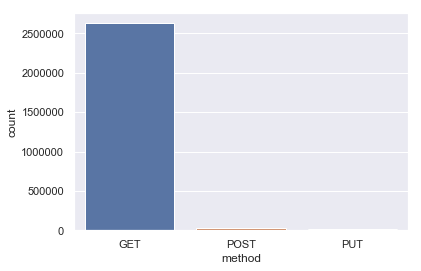

In [54]:
sns.countplot(data=dp, x='method')

In [59]:
x=dp.groupby(by='method').count()['url']

In [57]:
dp.head()

,method,url,httpcode,timeused
timestamp,,,,
2018-12-20 00:00:00,GET,communication-preferences,200,66
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:00,GET,communication-preferences,200,30
2018-12-20 00:00:00,GET,communication-preferences,200,41
2018-12-20 00:00:01,GET,communication-preferences,200,38


In [66]:
dp.groupby('method').describe()

timeused                                                       
            count       mean         std  min   25%   50%   75%      max
method                                                                  
GET     2629281.0  47.109804  667.076675  1.0  26.0  29.0  34.0  39925.0
POST      24887.0   9.259694    5.056288  2.0   6.0   8.0  11.0    236.0
PUT       20477.0  25.794452  437.956093  3.0   9.0  11.0  14.0  19021.0

In [65]:
x

method
GET     2629281
POST      24887
PUT       20477
Name: url, dtype: int64

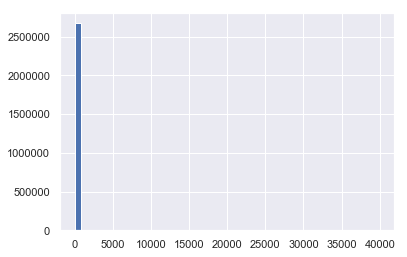

In [69]:
dp['timeused'].hist(bins=50)